## Data

In [1]:
import pandas as pd


data = pd.read_csv("Dataset/fraudTrain.csv")

print(data.head().to_string())

   Unnamed: 0 trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0           0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1           1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f85747349

## Categories

C:\Users\Joenathan\AppData\Local\Temp\ipykernel_29312\3989343916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_fraud_count.index, y=category_fraud_count.values, palette='viridis')


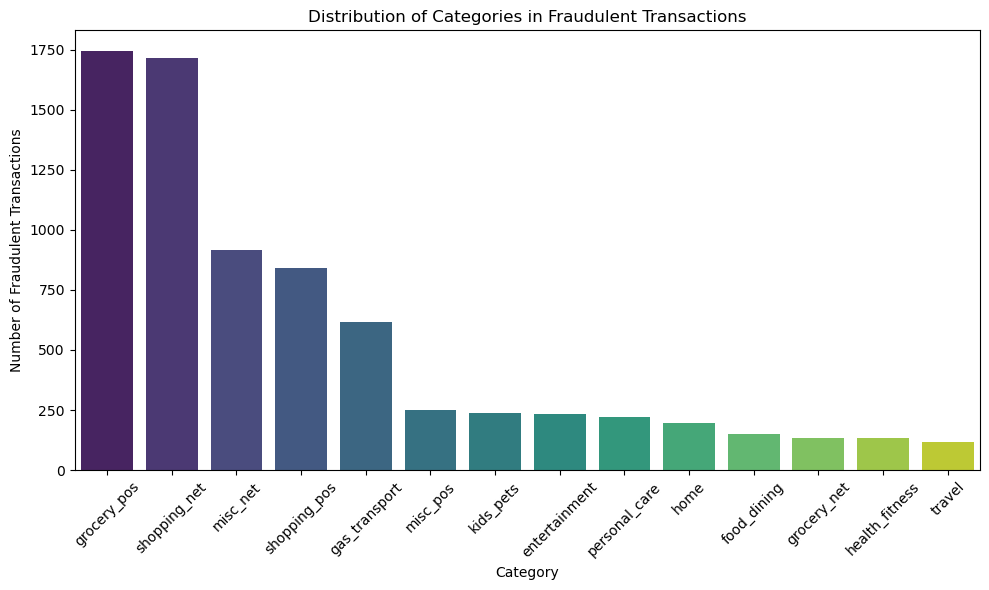

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_transactions = data[data["is_fraud"] == 1]

# Count the occurrences of each category in fraudulent transactions
category_fraud_count = fraud_transactions['category'].value_counts()

# Plot the distribution of categories in fraudulent transactions
plt.figure(figsize=(10, 6))
sns.barplot(x=category_fraud_count.index, y=category_fraud_count.values, palette='viridis')
plt.title('Distribution of Categories in Fraudulent Transactions')
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Fraud Distribution

C:\Users\Joenathan\AppData\Local\Temp\ipykernel_29312\2861522586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette = colors)


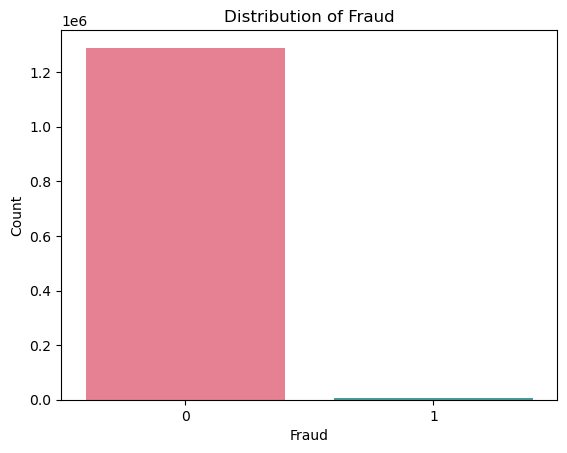

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_counts=data['is_fraud'].value_counts()
colors = sns.color_palette("husl", len(fraud_counts)) 
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette = colors)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [4]:
print(fraud_counts)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


## Time and Age

In [5]:
# Convert the 'trans_date' and 'dob' columns to datetime format
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

# Calculate the age at the time of transaction
data['age_at_transaction'] = data.apply(lambda row: row['trans_date_trans_time'].year - row['dob'].year - 
                                     ((row['trans_date_trans_time'].month, row['trans_date_trans_time'].day) < 
                                      (row['dob'].month, row['dob'].day)), axis=1)

# Print the DataFrame with the new column
print(data.head().to_string())

   Unnamed: 0 trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction
0           0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0                  30
1           1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs

In [6]:
df = data.copy()

df["trans_time"] = df["trans_date_trans_time"].dt.time

print(df.head().to_string())

   Unnamed: 0 trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction trans_time
0           0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0                  30   00:00:18
1           1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Spe

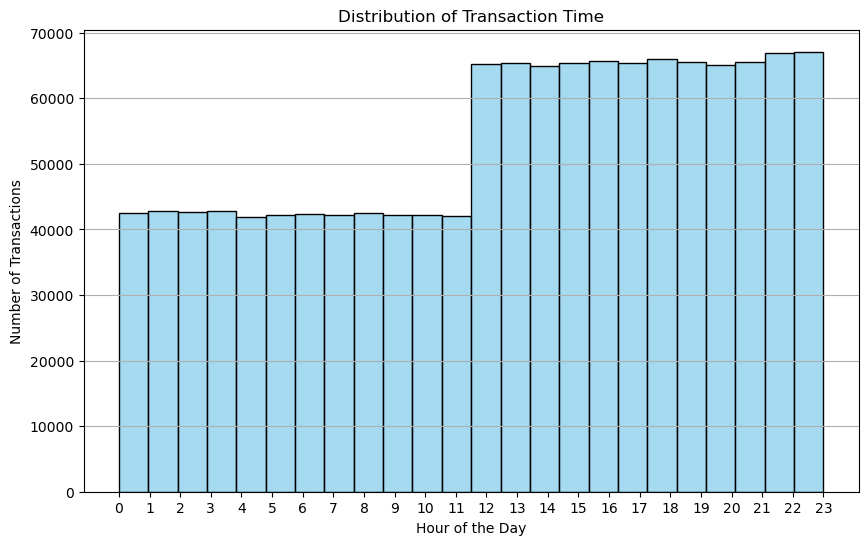

In [7]:
# Plot the distribution of transaction time
import seaborn as sns
import matplotlib.pyplot as plt

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract the hour from the transaction time
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour

# Plot the distribution of transaction time
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_hour'], bins=24, kde=False, color = "skyblue")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Time')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

In [8]:
print(df.head().to_string())

   Unnamed: 0 trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction trans_time  transaction_hour
0           0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0                  30   00:00:18                 0
1           1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  991

## Job Sectors and Amount

Text(0.5, 1.0, 'different job sectors')

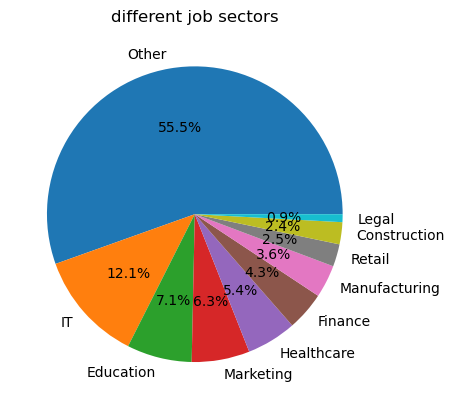

In [9]:
sector_bag = {
    "IT": ["engineer", "developer", "programmer", "software", "IT", "technician", "architect", "system", "network", 
           "administrator", "data scientist", "cybersecurity", "web developer", "analyst", "database", "devops"],
    
    "Education": ["teacher", "professor", "educator", "trainer", "lecturer", "scientist", "Orthoptist", "tutor", 
                  "principal", "instructor", "counselor", "academic", "researcher", "dean", "school", "headmaster"],
    
    "Healthcare": ["doctor", "nurse", "medical", "therapist", "pharmacist", "health", "surgeon", "dentist", "clinician", 
                   "physician", "optometrist", "radiologist", "paramedic", "midwife", "veterinarian", "psychiatrist"],
    
    "Finance": ["analyst", "accountant", "auditor", "banker", "financial", "investment", "controller", "broker", 
                "consultant", "treasurer", "loan officer", "trader", "actuary", "economist", "portfolio", "credit"],
    
    "Marketing": ["manager", "executive", "specialist", "consultant", "advertising", "public relations", "strategist", 
                  "director", "coordinator", "brand", "SEO", "content", "digital", "market research", "social media", 
                  "copywriter"],
    
    "Manufacturing": ["operator", "mechanic", "assembler", "fabricator", "engineer", "technician", "welder", 
                      "planner", "quality", "machinist", "production", "inspector", "supervisor", "foreman", 
                      "toolmaker", "CNC"],
    
    "Retail": ["cashier", "salesperson", "store", "associate", "manager", "clerk", "shopkeeper", "merchandiser", 
               "assistant", "retail", "customer service", "sales", "inventory", "buyer", "stocker", "checkout"],
    
    "Legal": ["lawyer", "attorney", "paralegal", "judge", "legal", "solicitor", "notary", "clerk", "litigator", 
              "advocate", "barrister", "counsel", "magistrate", "prosecutor", "defense", "compliance"],
    
    "Hospitality": ["chef", "waiter", "bartender", "host", "manager", "receptionist", "housekeeper", "concierge", 
                    "caterer", "cook", "hotel", "tour guide", "event planner", "sous chef", "sommelier", "valet"],
    
    "Construction": ["builder", "carpenter", "electrician", "plumber", "architect", "project manager", "site manager", 
                     "surveyor", "foreman", "bricklayer", "roofer", "civil engineer", "construction", "contractor", 
                     "inspector", "draftsman"]
}

def assign_sector(x):
    for key in sector_bag:
        for role in sector_bag[key]:
            if x.find(role) != -1:
                return key
    return "Other"

df["job_sector"] = df["job"].apply(assign_sector)
job = df["job_sector"].value_counts().reset_index()
plt.pie(x = job.get("count"), labels = job.get("job_sector"),autopct='%1.1f%%')
plt.title("different job sectors")


In [10]:
print(job)

      job_sector   count
0          Other  719084
1             IT  156850
2      Education   92212
3      Marketing   82135
4     Healthcare   70644
5        Finance   55114
6  Manufacturing   46400
7         Retail   31823
8   Construction   31219
9          Legal   11194


In [11]:
print(df.head().to_string())

   Unnamed: 0 trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction trans_time  transaction_hour  job_sector
0           0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0                  30   00:00:18                 0       Legal
1           1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393   

      job_sector        amt
0   Construction  66.123423
1      Education  65.778392
2        Finance  69.015842
3     Healthcare  71.589380
4             IT  71.211392
5          Legal  73.972324
6  Manufacturing  64.456137
7      Marketing  73.259242
8          Other  70.858498
9         Retail  71.419651


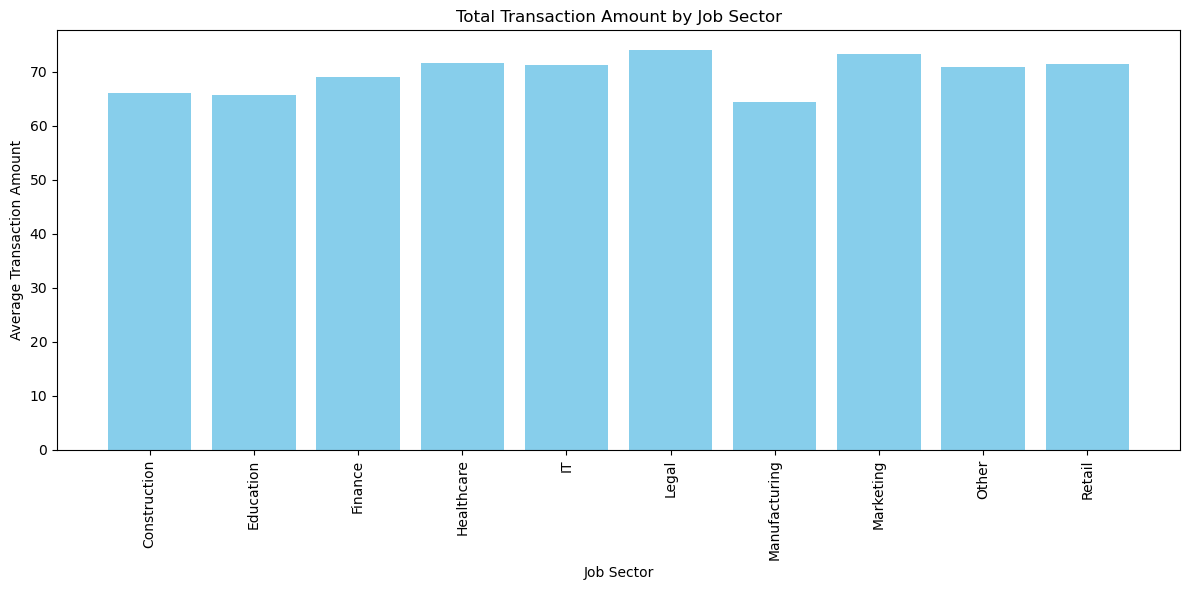

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by job sector and calculate the sum of transactions
job_sector_transactions = df.groupby('job_sector')['amt'].mean().reset_index()

print(job_sector_transactions.to_string())

# Plot the amount of transactions by job sector
plt.figure(figsize=(12, 6))
plt.bar(job_sector_transactions['job_sector'], job_sector_transactions['amt'], color='skyblue')
plt.xlabel('Job Sector')
plt.ylabel('Average Transaction Amount')
plt.title('Total Transaction Amount by Job Sector')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Merchant Fraud

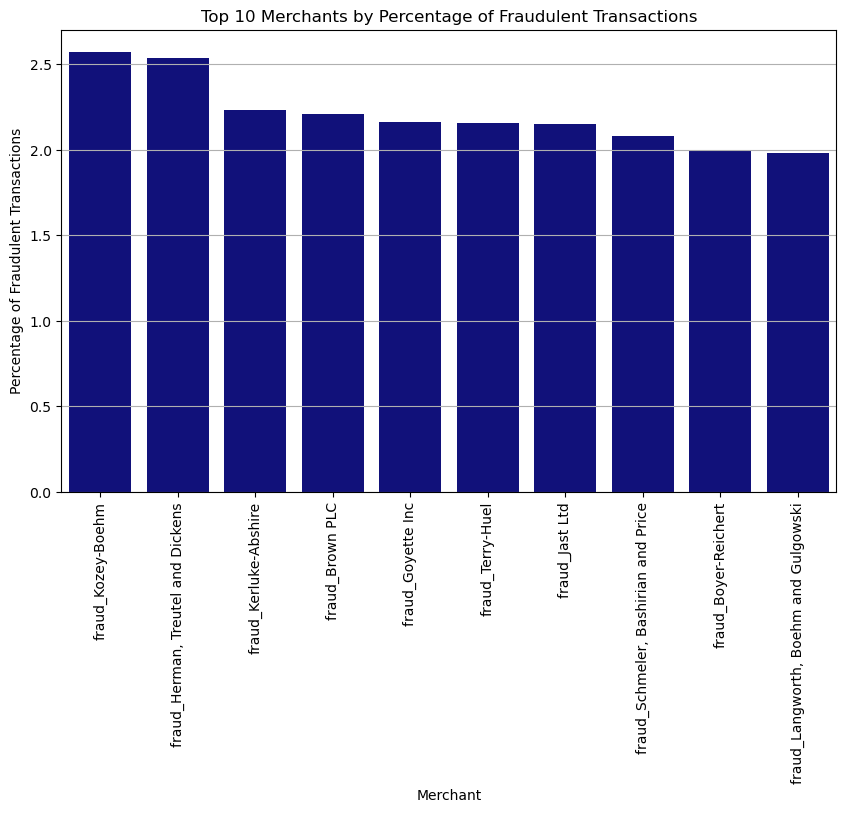

In [13]:
# Calculate the percentage of fraudulent transactions for each merchant
fraud_percentage = df.groupby('merchant')['is_fraud'].mean() * 100

# Sort the results by fraud percentage
fraud_percentage = fraud_percentage.sort_values(ascending=False)

# Sort the results and select the top 10
top_fraud_percentage = fraud_percentage.nlargest(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fraud_percentage.index, y=top_fraud_percentage.values, color='darkblue')
plt.xlabel('Merchant')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.title('Top 10 Merchants by Percentage of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [14]:
print(top_fraud_percentage.value_counts())

is_fraud
2.572347    1
2.538462    1
2.230686    1
2.210884    1
2.161606    1
2.154309    1
2.150538    1
2.083333    1
1.991614    1
1.980701    1
Name: count, dtype: int64


## Distance

In [15]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1_rad, lon1_rad = radians(lat1), radians(lon1)
    lat2_rad, lon2_rad = radians(lat2), radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

data["distance"] = data.apply(lambda row: haversine_distance(row["lat"], row['long'], row['merch_lat'], row['merch_long']), axis=1)

print(data.head().to_string())

   Unnamed: 0 trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction    distance
0           0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0                  30   78.597568
1           1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  S

In [16]:
print(data["distance"].describe())

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: distance, dtype: float64


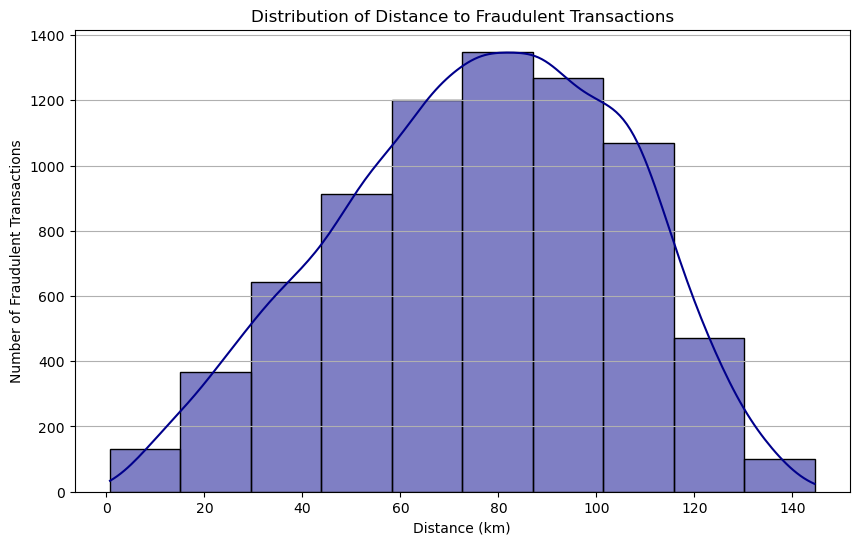

In [17]:
# Plot the distribution of distance to fraudulent transactions
fraudulent_data = data[data['is_fraud'] == 1]
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_data['distance'], bins=10, kde=True, color='darkblue')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Distance to Fraudulent Transactions')
plt.grid(axis='y')
plt.show()

In [18]:
fraud_distance = fraudulent_data["distance"]

# Round the distance values to 2 decimal places
fraud_distance_rounded = fraud_distance.round(2)

# Sort and print the rounded values
print(fraud_distance_rounded.sort_values(ascending=False).to_string())

114678     144.52
1148766    143.64
1115214    142.78
760824     141.56
635988     141.36
395989     141.34
1059247    140.13
374961     140.05
74121      139.99
1068975    139.63
4727       139.24
1288419    138.76
773013     138.64
1229827    138.43
1042785    138.21
930768     137.78
237095     137.77
1140960    137.23
209208     137.22
921571     136.90
189102     136.73
1295733    136.67
893151     136.59
1065684    136.47
1168136    136.44
346217     136.20
926294     136.17
1191912    136.16
88897      136.06
1126814    136.01
93556      135.93
351225     135.73
834224     135.68
74075      135.53
1288453    135.53
1278493    135.47
621562     135.46
625540     135.37
928896     135.35
1272885    135.21
114753     135.20
1067585    135.17
297458     135.13
738033     135.09
1118827    135.08
43628      135.08
1011227    135.01
890058     134.93
287083     134.62
364814     134.61
122756     134.45
1094998    134.42
580060     134.35
354110     134.33
616169     134.20
179541    

In [19]:
fraud_distance_rounded.to_csv("fraud_distance.csv", index=False, sep = ",")

## Transaction Last Hour and Last Day

In [20]:
# Convert 'datetime' column to pandas datetime type
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Sort values by credit_card_number and datetime
data = data.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Set 'datetime' as index
data.set_index('trans_date_trans_time', inplace=True)

# Group by 'credit_card_number' and apply rolling window of 1 hour
data['transactions_last_hour'] = data.groupby('cc_num')['amt'].rolling('1h').count().reset_index(0, drop=True)

# Group by 'credit_card_number' and apply rolling window of 1 day
data['transactions_last_day'] = data.groupby('cc_num')['amt'].rolling('1D').count().reset_index(0, drop=True)

# Show the result
data.reset_index(inplace=True)

print(data.head().to_string())



  trans_date_trans_time  Unnamed: 0       cc_num                           merchant       category    amt first  last gender            street           city state    zip      lat      long  city_pop                          job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction    distance  transactions_last_hour  transactions_last_day
0   2019-01-01 12:47:15        1017  60416207185  fraud_Jones, Sawayn and Romaguera       misc_net   7.27  Mary  Diaz      F  9886 Anita Drive  Fort Washakie    WY  82514  43.0048 -108.8964      1645  Information systems manager 1986-02-17  98e3dcf98101146a577f85a34e58feec  1325422035  43.974711 -109.741904         0                  32  127.606239                     1.0                    1.0
1   2019-01-02 08:44:57        2724  60416207185                    fraud_Berge LLC  gas_transport  52.94  Mary  Diaz      F  9886 Anita Drive  Fort Washakie    WY  82514  43.0048 -108.8964      1645  Inf

In [21]:
print(data.head().to_string())

  trans_date_trans_time  Unnamed: 0       cc_num                           merchant       category    amt first  last gender            street           city state    zip      lat      long  city_pop                          job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction    distance  transactions_last_hour  transactions_last_day
0   2019-01-01 12:47:15        1017  60416207185  fraud_Jones, Sawayn and Romaguera       misc_net   7.27  Mary  Diaz      F  9886 Anita Drive  Fort Washakie    WY  82514  43.0048 -108.8964      1645  Information systems manager 1986-02-17  98e3dcf98101146a577f85a34e58feec  1325422035  43.974711 -109.741904         0                  32  127.606239                     1.0                    1.0
1   2019-01-02 08:44:57        2724  60416207185                    fraud_Berge LLC  gas_transport  52.94  Mary  Diaz      F  9886 Anita Drive  Fort Washakie    WY  82514  43.0048 -108.8964      1645  Inf

In [22]:
df = data[["merchant","category","amt","job","age_at_transaction","distance","transactions_last_hour","transactions_last_day","is_fraud"]]

df = df[:200]

df.to_csv("frauddata.csv", index=False, sep = ",")

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
data['merchant'] = le.fit_transform(data['merchant'])
data['category'] = le.fit_transform(data['category'])
data['job'] = le.fit_transform(data['job'])

print(data.head().to_string())


  trans_date_trans_time  Unnamed: 0       cc_num  merchant  category    amt first  last gender            street           city state    zip      lat      long  city_pop  job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  age_at_transaction    distance  transactions_last_hour  transactions_last_day
0   2019-01-01 12:47:15        1017  60416207185       293         8   7.27  Mary  Diaz      F  9886 Anita Drive  Fort Washakie    WY  82514  43.0048 -108.8964      1645  246 1986-02-17  98e3dcf98101146a577f85a34e58feec  1325422035  43.974711 -109.741904         0                  32  127.606239                     1.0                    1.0
1   2019-01-02 08:44:57        2724  60416207185        43         2  52.94  Mary  Diaz      F  9886 Anita Drive  Fort Washakie    WY  82514  43.0048 -108.8964      1645  246 1986-02-17  498120fc45d277f7c88e3dba79c33865  1325493897  42.018766 -109.044172         0                  32  110.308921                

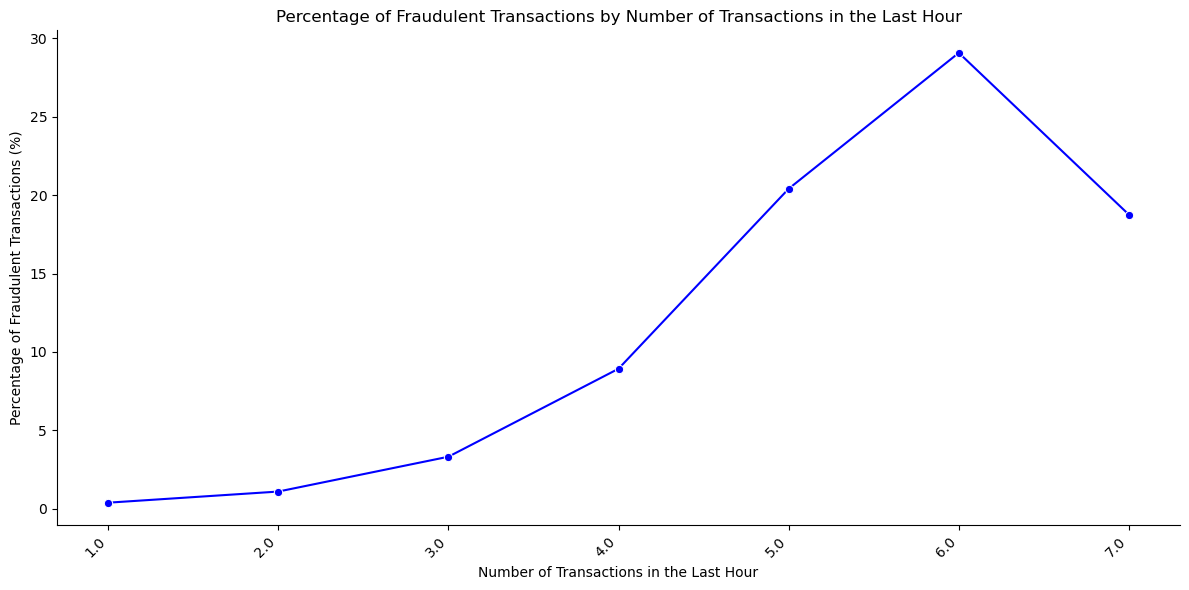

In [24]:
# Calculate total and fraudulent transactions per bin
bin_counts = data.groupby('transactions_last_hour')['is_fraud'].agg(['count', 'sum']).reset_index()
bin_counts.rename(columns={'count': 'total_transactions', 'sum': 'fraudulent_transactions'}, inplace=True)

# Calculate the percentage of fraudulent transactions in each bin
bin_counts['fraud_percentage'] = (bin_counts['fraudulent_transactions'] / bin_counts['total_transactions']) * 100


# Plot the percentage of fraudulent transactions
plt.figure(figsize=(12, 6))
sns.lineplot(x=bin_counts['transactions_last_hour'].astype(str), y=bin_counts['fraud_percentage'], marker='o', color='blue')
plt.xlabel('Number of Transactions in the Last Hour')
plt.ylabel('Percentage of Fraudulent Transactions (%)')
plt.title('Percentage of Fraudulent Transactions by Number of Transactions in the Last Hour')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.grid(False)
sns.despine()
plt.show()


In [25]:
print(bin_counts.head().to_string())

fraud_transactions_last_hour = bin_counts[["transactions_last_hour", "fraud_percentage"]]

print(fraud_transactions_last_hour.to_string())




   transactions_last_hour  total_transactions  fraudulent_transactions  fraud_percentage
0                     1.0             1084162                     4240          0.391085
1                     2.0              183889                     2023          1.100120
2                     3.0               24757                      822          3.320273
3                     4.0                3270                      292          8.929664
4                     5.0                 495                      101         20.404040
   transactions_last_hour  fraud_percentage
0                     1.0          0.391085
1                     2.0          1.100120
2                     3.0          3.320273
3                     4.0          8.929664
4                     5.0         20.404040
5                     6.0         29.069767
6                     7.0         18.750000


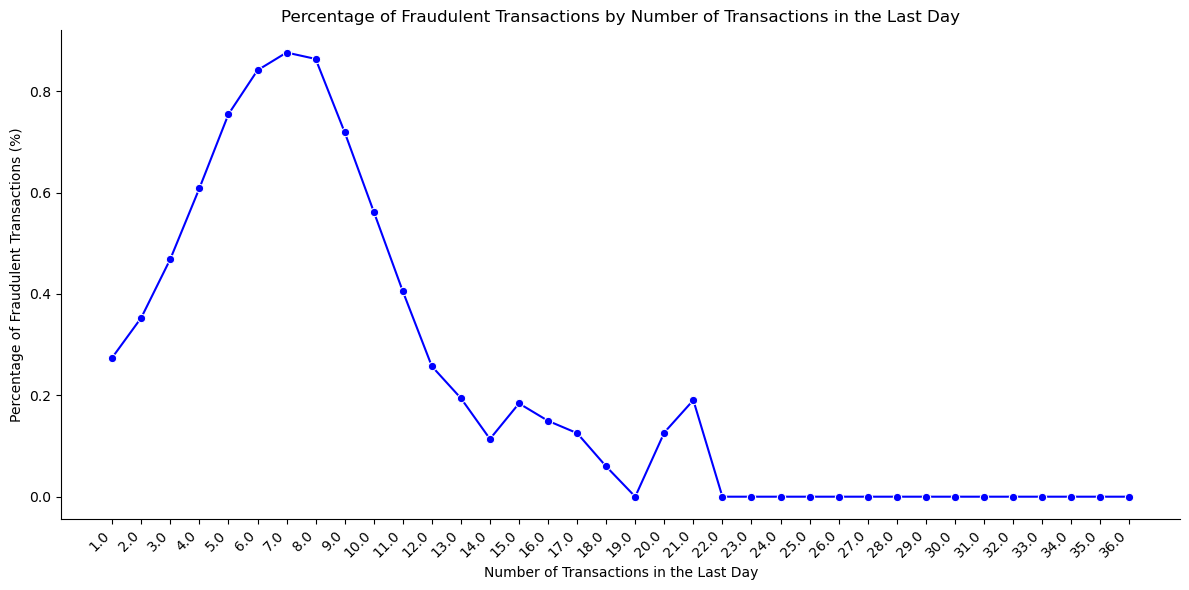

In [26]:
# Calculate total and fraudulent transactions per bin
bin_counts = data.groupby('transactions_last_day')['is_fraud'].agg(['count', 'sum']).reset_index()
bin_counts.rename(columns={'count': 'total_transactions', 'sum': 'fraudulent_transactions'}, inplace=True)

# Calculate the percentage of fraudulent transactions in each bin
bin_counts['fraud_percentage'] = (bin_counts['fraudulent_transactions'] / bin_counts['total_transactions']) * 100


# Plot the percentage of fraudulent transactions
plt.figure(figsize=(12, 6))
sns.lineplot(x=bin_counts['transactions_last_day'].astype(str), y=bin_counts['fraud_percentage'], marker='o', color='blue')
plt.xlabel('Number of Transactions in the Last Day')
plt.ylabel('Percentage of Fraudulent Transactions (%)')
plt.title('Percentage of Fraudulent Transactions by Number of Transactions in the Last Day')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.grid(False)
sns.despine()
plt.show()

In [27]:
print(bin_counts.head().to_string())

fraud_transactions_last_day= bin_counts[["transactions_last_day", "fraud_percentage"]]

fraud_transactions_last_day["fraud_percentage"] = fraud_transactions_last_day["fraud_percentage"].round(2)

fraud_transactions_last_day["fraud_percentage"] = fraud_transactions_last_day["fraud_percentage"].apply(lambda x: f"{x*100:.2f}%")

print(fraud_transactions_last_day.to_string())

   transactions_last_day  total_transactions  fraudulent_transactions  fraud_percentage
0                    1.0              108923                      299          0.274506
1                    2.0              185421                      655          0.353250
2                    3.0              207234                      972          0.469035
3                    4.0              193736                     1179          0.608560
4                    5.0              161922                     1222          0.754684
    transactions_last_day fraud_percentage
0                     1.0           27.00%
1                     2.0           35.00%
2                     3.0           47.00%
3                     4.0           61.00%
4                     5.0           75.00%
5                     6.0           84.00%
6                     7.0           88.00%
7                     8.0           86.00%
8                     9.0           72.00%
9                    10.0           56.00%

C:\Users\Joenathan\AppData\Local\Temp\ipykernel_29312\2926494396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions_last_day["fraud_percentage"] = fraud_transactions_last_day["fraud_percentage"].round(2)
C:\Users\Joenathan\AppData\Local\Temp\ipykernel_29312\2926494396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions_last_day["fraud_percentage"] = fraud_transactions_last_day["fraud_percentage"].apply(lambda x: f"{x*100:.2f}%")


## Distribution of Fraud after SMOTE

C:\Users\Joenathan\AppData\Local\Temp\ipykernel_29312\470327765.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette = colors)


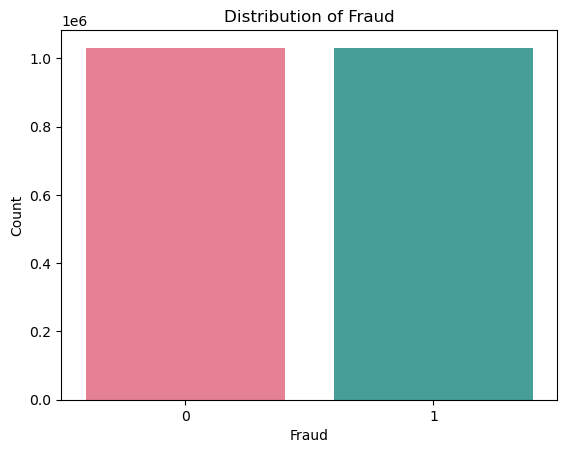

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

data = data[['merchant', 'category', 'amt','job', 'age_at_transaction','distance','transactions_last_hour', 'transactions_last_day', 'is_fraud']]

X = data.drop('is_fraud', axis=1)
Y = data["is_fraud"]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

fraud_counts=Y_train_smote.value_counts()

sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette = colors)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [29]:
print(fraud_counts)

is_fraud
0    1031383
1    1031383
Name: count, dtype: int64


# HeatMap

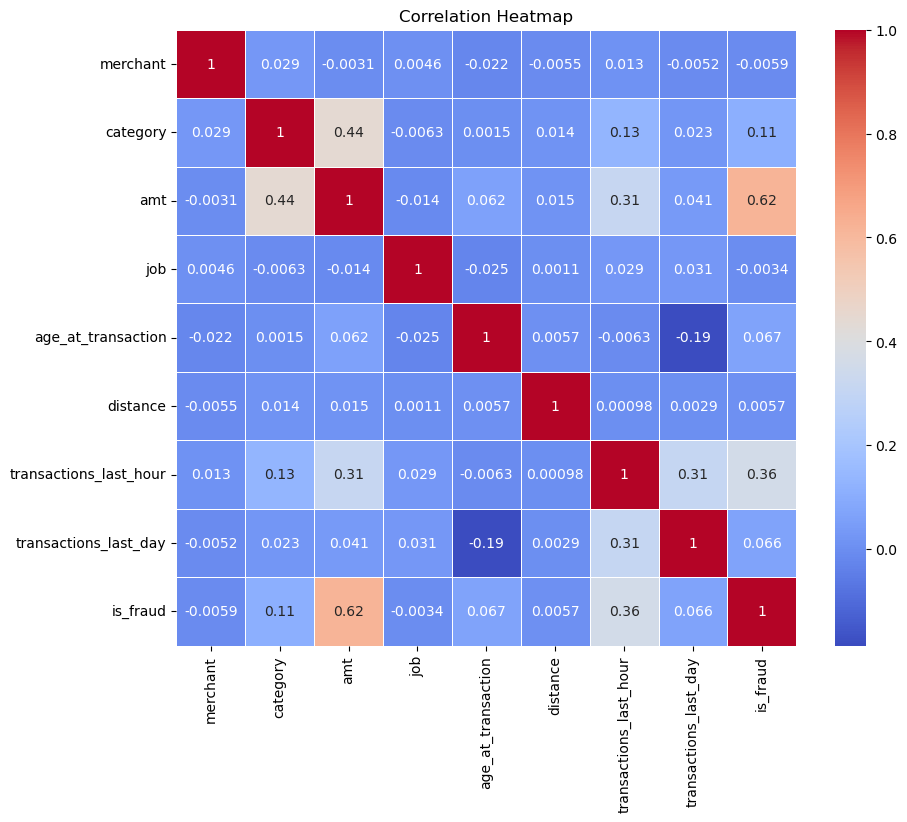

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

new_data = X_train_smote
new_data['is_fraud'] = Y_train_smote
correlation_matrix = new_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()